In [3]:
### Lab 5

library(rjags)

# 1

cat("model{

  # pi ~ dbeta(0.01, 0.01) # prior1
  # pi ~ dunif(0, 1) # prior2
  pi ~ dbeta(0.5, 0.5) # prior3
  r ~ dbin(pi, N) # likelihood
  
  # number of replying immoral in new survey
  r.new ~ dbin(pi, N)
  pi.new <- r.new/N # new probability for group responding 'immoral'

}",
  
  file = "gallup.jag"
)

Loading required package: coda

Linked to JAGS 4.3.0

Loaded modules: basemod,bugs



Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 1
   Unobserved stochastic nodes: 2
   Total graph size: 6

Initializing model




Iterations = 2010:12000
Thinning interval = 10 
Number of chains = 1 
Sample size per chain = 1000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
     0.1997843      0.0206652      0.0006535      0.0005290 

2. Quantiles for each variable:

  2.5%    25%    50%    75%  97.5% 
0.1571 0.1864 0.1997 0.2130 0.2384 


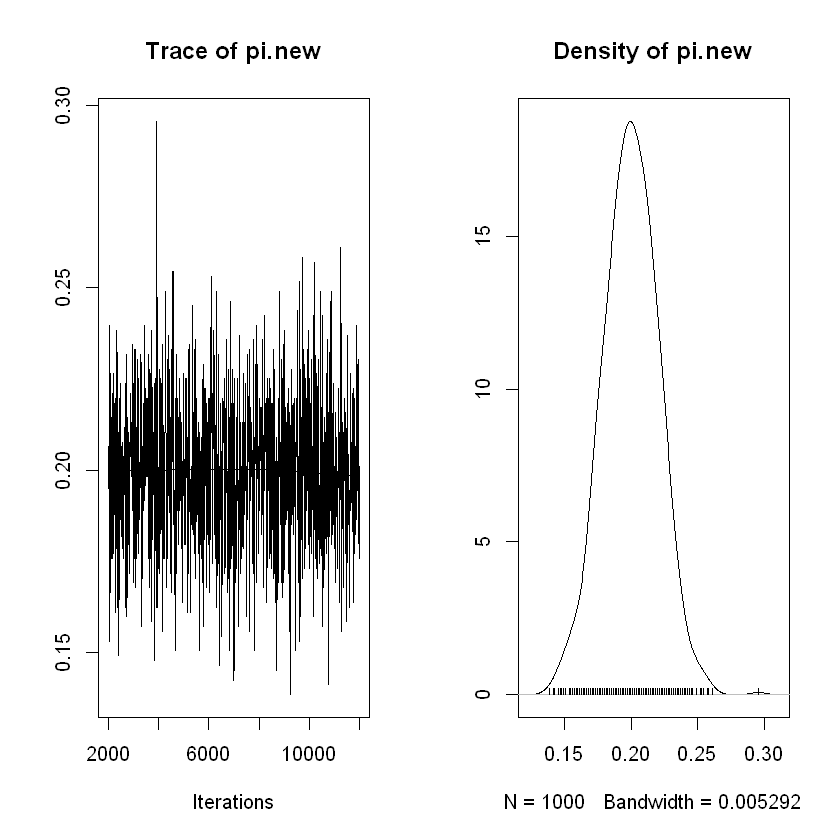

In [4]:
# a)

gal.data1 = list(N=751, r=150)

gal.inits = list(pi=0.5, r.new=0)

gal1 <- jags.model(file = "gallup.jag", data = gal.data1, n.chains = 1, inits = gal.inits, n.adapt = 2000)

gal1.par <- c("pi.new")

res.gal1 <- coda.samples(gal1, var=gal1.par, n.iter = 10000, thin = 10)

# results for prior1 Beta (0.01,0.01)
summary(res.gal1)

# 1. Empirical mean and standard deviation for each variable,
# plus standard error of the mean:
#   
#   Mean             SD       Naive SE Time-series SE 
# 0.1997044      0.0209795      0.0006634      0.0006387 
# 
# 2. Quantiles for each variable:
#   
#   2.5%    25%    50%    75%  97.5% 
# 0.1598 0.1851 0.1984 0.2130 0.2423

# posterior mean = 0.1997044

# 95% posterior credible interval on pi = (0.1598, 0.2423)



plot(res.gal1)

# results for prior2 uniform(0,1)=Beta(1,1)

# 1. Empirical mean and standard deviation for each variable,
# plus standard error of the mean:
#   
#   Mean             SD       Naive SE Time-series SE 
# 0.2003555      0.0208431      0.0006591      0.0006591 
# 
# 2. Quantiles for each variable:
#   
#   2.5%    25%    50%    75%  97.5% 
# 0.1637 0.1864 0.1997 0.2144 0.2437

plot(res.gal1)

# posterior mean = 0.2003555

# 95% posterior credible interval on pi = (0.1637, 0.2437)


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 1
   Unobserved stochastic nodes: 2
   Total graph size: 6

Initializing model




Iterations = 2010:12000
Thinning interval = 10 
Number of chains = 1 
Sample size per chain = 1000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
      0.053250       0.101024       0.003195       0.003753 

2. Quantiles for each variable:

 2.5%   25%   50%   75% 97.5% 
0.000 0.000 0.000 0.125 0.375 


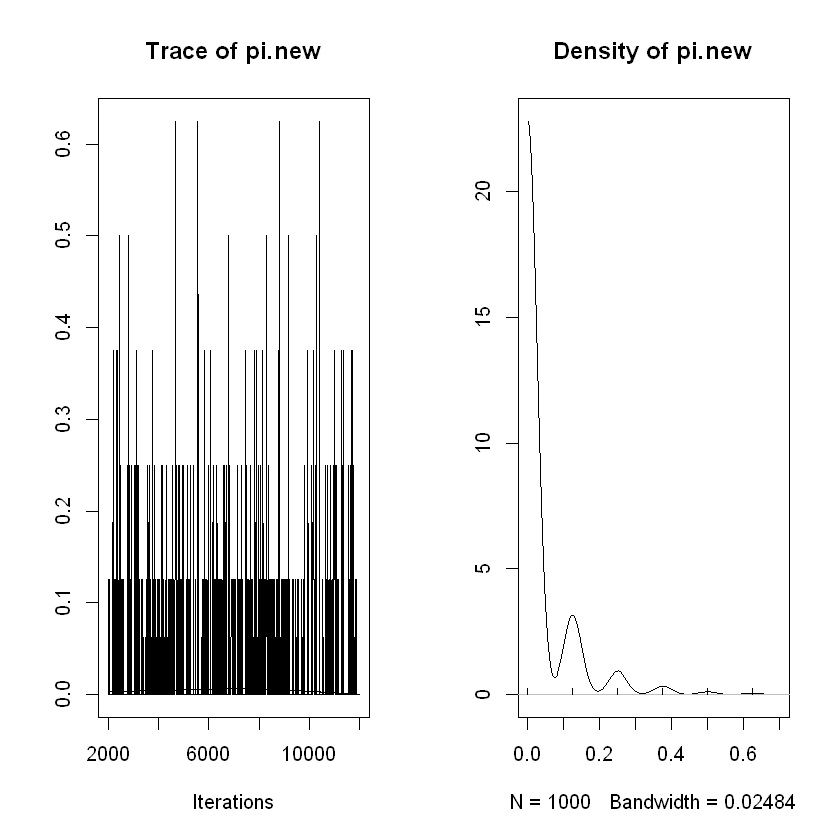

In [5]:
# b)

gal.data2 = list(N=8, r=0)

gal.inits = list(pi=0.5, r.new=0)

gal2 <- jags.model(file = "gallup.jag", data = gal.data2, n.chains = 1, inits = gal.inits, n.adapt = 2000)

gal2.par <- c("pi.new")

res.gal2 <- coda.samples(gal2, var=gal2.par, n.iter = 10000, thin = 10)

summary(res.gal2)

# results for prior1  Beta (0.01,0.01)

# 1. Empirical mean and standard deviation for each variable,
# plus standard error of the mean:
#   
#   Mean             SD       Naive SE Time-series SE 
# 0.0018750      0.0152017      0.0004807      0.0006555 
# 
# 2. Quantiles for each variable:
#   
#   2.5%   25%   50%   75% 97.5% 
# 0     0     0     0     0

# posterior mean = 0.0018750

# 95% posterior credible interval on pi = (0, 0)


plot(res.gal2)



# results for prior2 uniform(0,1)=Beta(1,1)

# 1. Empirical mean and standard deviation for each variable,
# plus standard error of the mean:
#   
#   Mean             SD       Naive SE Time-series SE 
# 0.098750       0.131280       0.004151       0.004151 
# 
# 2. Quantiles for each variable:
#   
#   2.5%   25%   50%   75% 97.5% 
# 0.000 0.000 0.000 0.125 0.375

# posterior mean = 0.098750

# 95% posterior credible interval on pi = (0.000, 0.375)



plot(res.gal2)

# results for prior3 Beta (0.5,0.5)

# 1. Empirical mean and standard deviation for each variable,
# plus standard error of the mean:
#   
#   Mean             SD       Naive SE Time-series SE 
# 0.053750       0.107663       0.003405       0.003577 
# 
# 2. Quantiles for each variable:
#   
#   2.5%   25%   50%   75% 97.5% 
# 0.000 0.000 0.000 0.125 0.375

# posterior mean = 0.053750

# 95% posterior credible interval on pi = (0.000, 0.375)



In [7]:
# 2

cat("model{

 # likelihood
 for (i in 1:N){
 y[i] ~ dt(mu, sigma, 4)
 
 }
 
 # prediction
 for(j in 67:68){
 y.new[j] ~ dt(mu, sigma, 4)
 }
 
 # prior
 
 mu ~ dnorm(0, 1.0E-06)
 sigma ~ dgamma(0.0001, 0.0001)
 tau <- 1/sigma

}",
    
    file = "light.jag"
)

light.inits = list(mu=10, sigma=1)

light.data = list(y=c(28,26,33,24,34,-44,27,16,40,-2,29,22,24,21,25,30,23,29,31,19,24,20,36,32,
                      36,28,25,21,28,29,37,25,28,26,30,32,36,26,30,22,36,23,27,27,28,27,31,27,26,
                      33,26,32,32,24,39,28,24,25,32,25,29,27,28,29,16,23), N=66)


light.deviations <- jags.model(file = 'light.jag', data = light.data, n.chains = 1, inits = light.inits, n.adapt = 2000)

light.par <- c("mu", "tau", "y.new")

res.light <- coda.samples(light.deviations, var=light.par, n.iter = 10000, thin = 10)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 66
   Unobserved stochastic nodes: 4
   Total graph size: 77

Initializing model




Iterations = 2010:12000
Thinning interval = 10 
Number of chains = 1 
Sample size per chain = 1000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

           Mean     SD Naive SE Time-series SE
mu        27.48 0.6834  0.02161        0.02161
tau       21.22 5.2647  0.16648        0.16648
y.new[67] 27.47 6.5416  0.20686        0.20686
y.new[68] 27.18 6.3416  0.20054        0.20054

2. Quantiles for each variable:

           2.5%   25%   50%   75% 97.5%
mu        26.20 27.02 27.49 27.92 28.87
tau       12.68 17.54 20.51 24.09 33.21
y.new[67] 14.30 23.74 27.37 30.94 40.79
y.new[68] 14.17 23.87 27.26 30.93 38.48


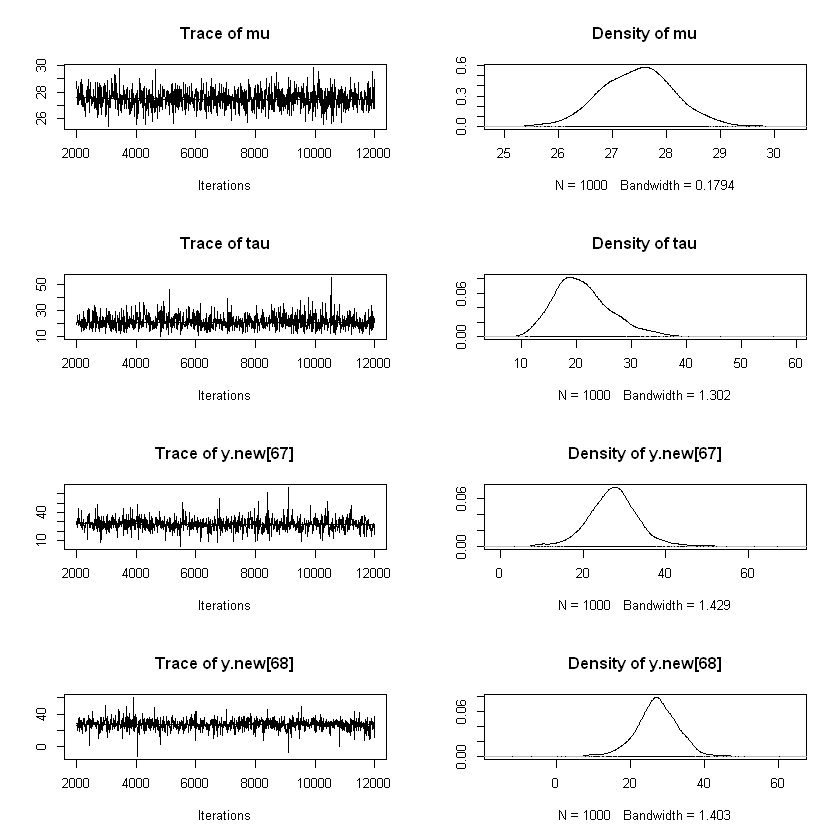

In [8]:
# a), c)

summary(res.light)

plot(res.light)


# 1. Empirical mean and standard deviation for each variable,
# plus standard error of the mean:
#   
#           Mean     SD Naive SE Time-series SE
# mu        27.48 0.6802  0.02151        0.02151
# tau       21.47 5.5027  0.17401        0.17401
# y.new[67] 27.69 6.3905  0.20209        0.20209
# y.new[68] 27.39 6.4683  0.20455        0.20455
# 
# 2. Quantiles for each variable:
#   
#           2.5%   25%   50%   75% 97.5%
# mu        26.15 27.05 27.49 27.94 28.77
# tau       12.96 17.47 20.66 24.61 33.77
# y.new[67] 15.63 24.15 27.58 31.07 39.82
# y.new[68] 15.27 23.89 27.31 30.82 40.57



Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 66
   Unobserved stochastic nodes: 4
   Total graph size: 76

Initializing model




Iterations = 10:10000
Thinning interval = 10 
Number of chains = 1 
Sample size per chain = 1000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

            Mean     SD Naive SE Time-series SE
mu         26.19  1.398  0.04421        0.04421
tau       119.05 21.486  0.67944        0.67944
y.new[67]  26.07 10.914  0.34513        0.34513
y.new[68]  26.11 11.488  0.36329        0.36329

2. Quantiles for each variable:

            2.5%    25%    50%    75%  97.5%
mu        23.462  25.24  26.14  27.16  28.90
tau       83.752 103.46 116.65 131.58 166.05
y.new[67]  4.155  18.77  25.83  33.10  47.82
y.new[68]  3.969  18.00  26.04  33.65  48.51


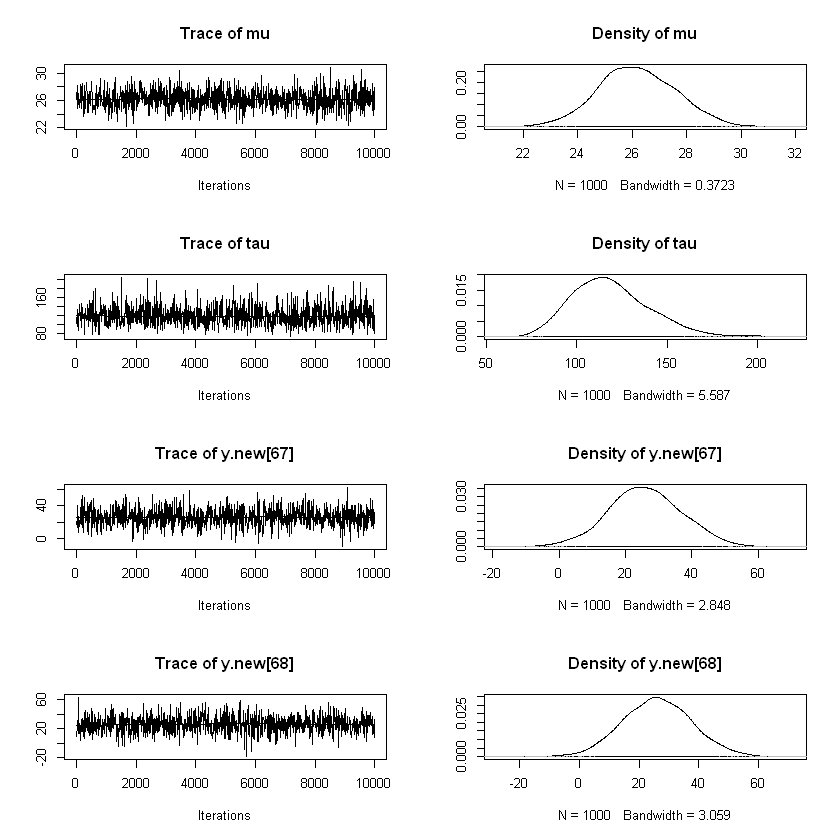

In [9]:
# b), c)


cat("model{

 # likelihood
 for (i in 1:N){
 y[i] ~ dnorm(mu, sigma2)
 
 }
 
 # prediction
 for(j in 67:68){
 y.new[j] ~ dnorm(mu, sigma2)
 }
 
 # prior
 
 mu ~ dnorm(0, 1.0E-06)
 sigma2 ~ dgamma(0.0001, 0.0001)
 tau <- 1/sigma2

}",
    
    file = "light1.jag"
)



light.inits1 = list(mu=10, sigma2=1)

light.deviations1 <- jags.model(file = 'light1.jag', data = light.data, n.chains = 1, inits = light.inits1, n.adapt = 2000)

light.par1 <- c("mu", "tau", "y.new")

res.light1 <- coda.samples(light.deviations1, var=light.par1, n.iter = 10000, thin = 10)

summary(res.light1)

plot(res.light1)


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 26
   Unobserved stochastic nodes: 2
   Total graph size: 30

Initializing model




Iterations = 10:10000
Thinning interval = 10 
Number of chains = 3 
Sample size per chain = 1000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

           Mean     SD Naive SE Time-series SE
fatal[27] 24.39 4.9889  0.09108        0.09108
lambda    24.30 0.9559  0.01745        0.01802

2. Quantiles for each variable:

           2.5%   25%  50%   75% 97.5%
fatal[27] 15.00 21.00 24.0 28.00 34.00
lambda    22.44 23.65 24.3 24.95 26.18


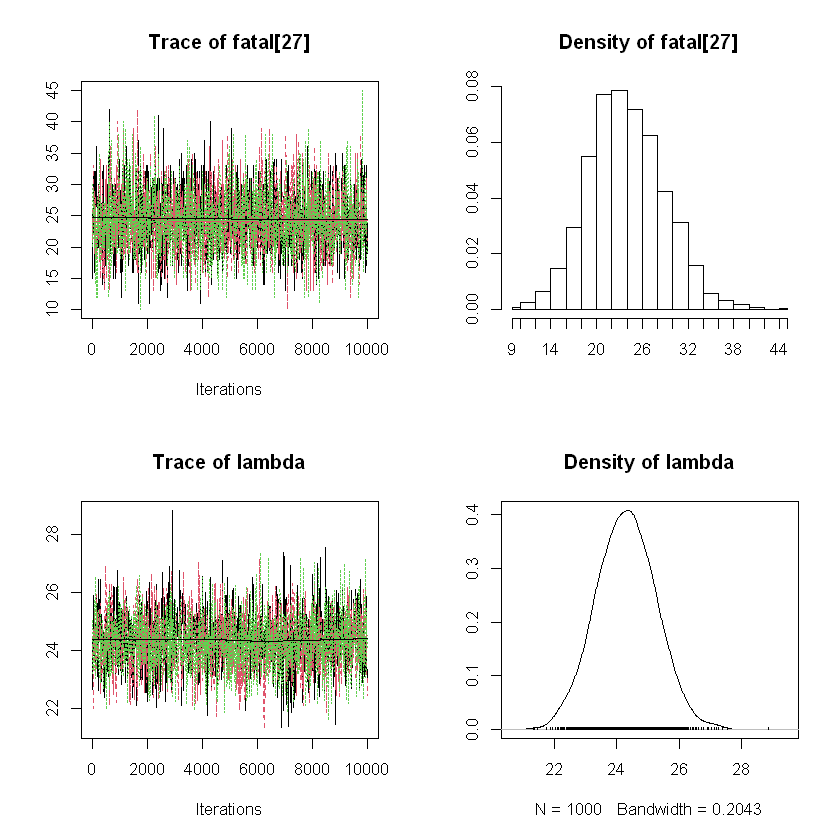

In [10]:
# 3)


cat("model{

 # likelihood
 for (i in 1:I){
 fatal[i] ~ dpois(lambda)
 
 }
 
  # prior
 lambda ~ dgamma(0.1, 0.1)
 

}",
    
    file = "airline.jag"
)



airline.fatalities <- read.table(file = "airline.txt", header=T, sep="") 

air.data <- list(fatal=c(airline.fatalities$fatal, NA), I=27)

air.inits <- list(list(lambda=15), list(lambda=23), list(lambda=30))

fatalities.model <- jags.model(file = "airline.jag", data = air.data, n.chains = 3, inits = air.inits, n.adapt = 2000)

air.par <- c("lambda", "fatal[27]") # predict the next observation

res.air <- coda.samples(model = fatalities.model, var=air.par, n.iter = 10000, thin = 10)

summary(res.air)

# 1. Empirical mean and standard deviation for each variable,
# plus standard error of the mean:
#   
#   Mean     SD Naive SE Time-series SE
# fatal[27] 24.21 5.0880  0.09289        0.08617
# lambda    24.30 0.9592  0.01751        0.01780
# 
# 2. Quantiles for each variable:
#   
#           2.5%   25%   50%   75% 97.5%
# fatal[27] 15.0 21.00 24.00 27.00 35.00
# lambda    22.4 23.64 24.27 24.95 26.23

plot(res.air)

In [11]:
# 4

cat("model{

 # likelihood
 for (i in 1:N){
  b.mass[i] ~ dnorm(mu[i], psi)
  mu[i] <- beta0 + beta1*gen[i] + beta2*b.length[i]
 
 }
 
  # priors
 beta0 ~ dnorm(0.0, 1.0E-04)
 beta1 ~ dnorm(0.0, 1.0E-04)
 beta2 ~ dnorm(0.0, 1.0E-04)
 psi ~ dunif(0, 100)
 sigma <- 1.0/sqrt(psi) # standard deviation
 

}",
    
    file = "snake.jag"
)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 50
   Unobserved stochastic nodes: 4
   Total graph size: 263

Initializing model




Iterations = 2010:12000
Thinning interval = 10 
Number of chains = 3 
Sample size per chain = 1000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

       Mean     SD Naive SE Time-series SE
beta1 5.315 1.4333 0.026168        0.02605
beta2 7.384 0.6149 0.011226        0.01086
sigma 4.962 0.5114 0.009338        0.00934

2. Quantiles for each variable:

       2.5%   25%   50%   75% 97.5%
beta1 2.400 4.378 5.337 6.271 8.079
beta2 6.152 6.981 7.398 7.779 8.636
sigma 4.114 4.608 4.909 5.271 6.139


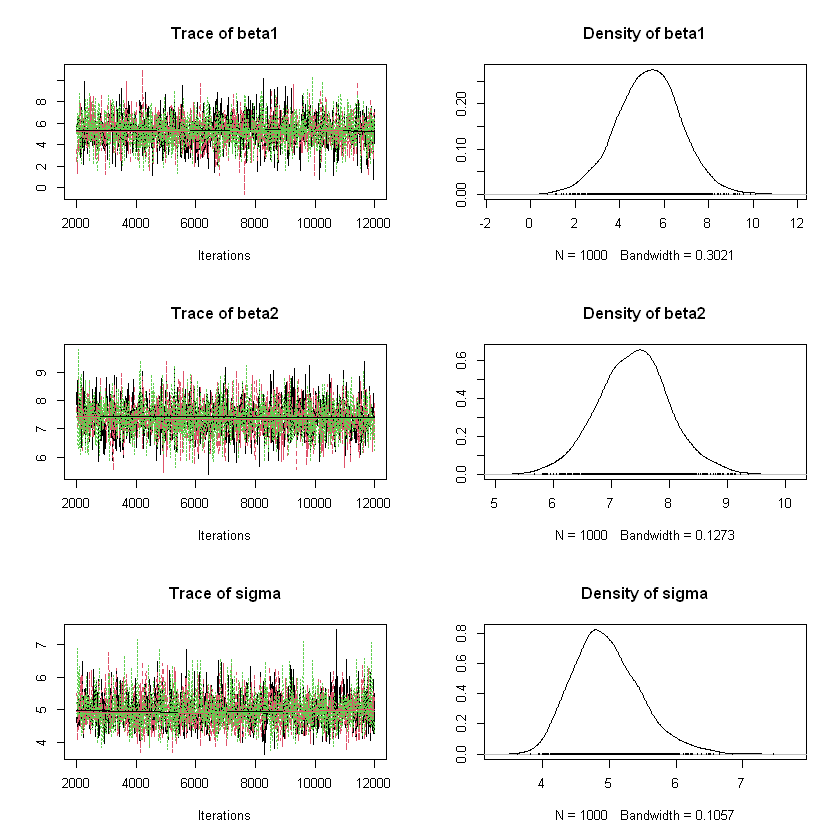

In [12]:
# a)

snake.inits <- list(list(beta0=2, beta1=1, beta2=2, psi=1), list(beta0=2, beta1=5, beta2=2, psi=0.5), list(beta0=2, beta1=1, beta2=1, psi=0.05))

snake <- read.table(file = "snake.txt", header=T, sep="")

snake.data <- list(b.mass=snake$b_mass, b.length=snake$b_length, gen=snake$gen, N=length(snake$b_mass))

snake.model <- jags.model(file = "snake.jag", data = snake.data, inits = snake.inits, n.chains = 3, n.adapt = 2000)

snake.par <- c("beta1", "beta2", "sigma")

res.snake <- coda.samples(model = snake.model, variable.names = snake.par, n.iter = 10000, thin = 10)

summary(res.snake)



plot(res.snake)

,beta1,beta2,sigma
Lag 0,1.00000000,1.000000000,1.000000000
Lag 10,0.03118653,-0.037889269,0.032665921
Lag 50,0.02807971,-0.010912926,-0.009250506
Lag 100,-0.02831578,0.004258111,0.015774471
Lag 500,0.01902215,-0.038483185,0.019976780


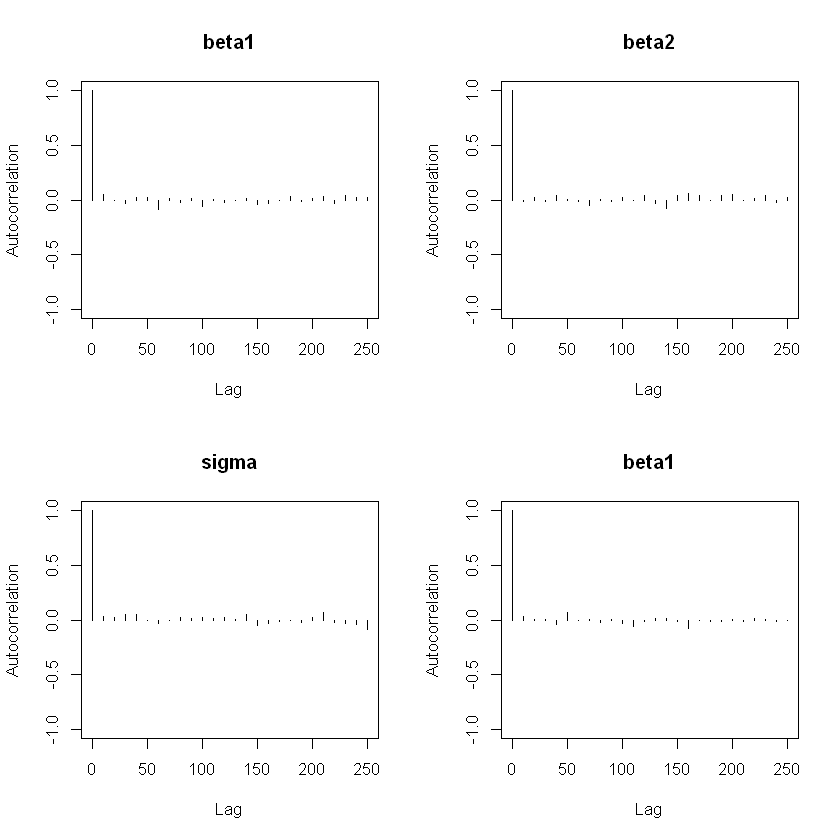

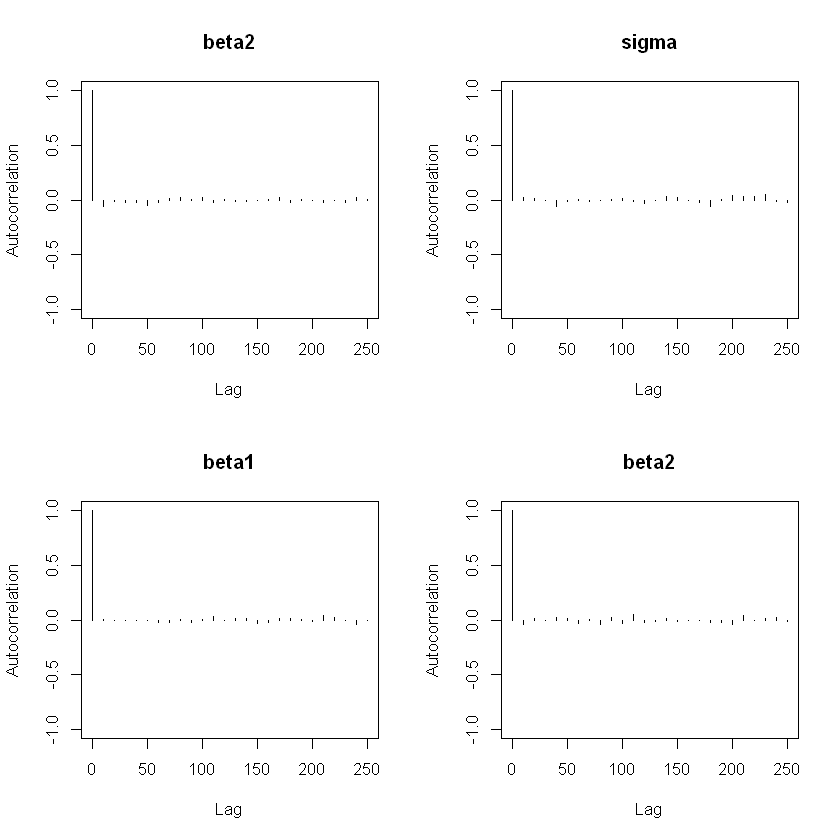

Potential scale reduction factors:

      Point est. Upper C.I.
beta1          1       1.00
beta2          1       1.01
sigma          1       1.00

Multivariate psrf

1

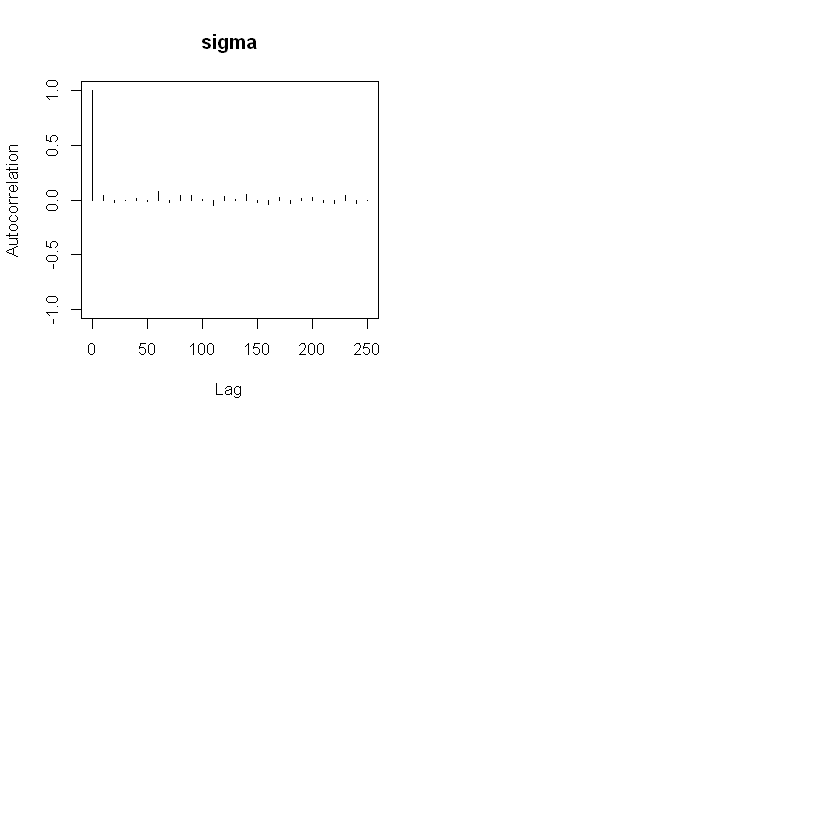

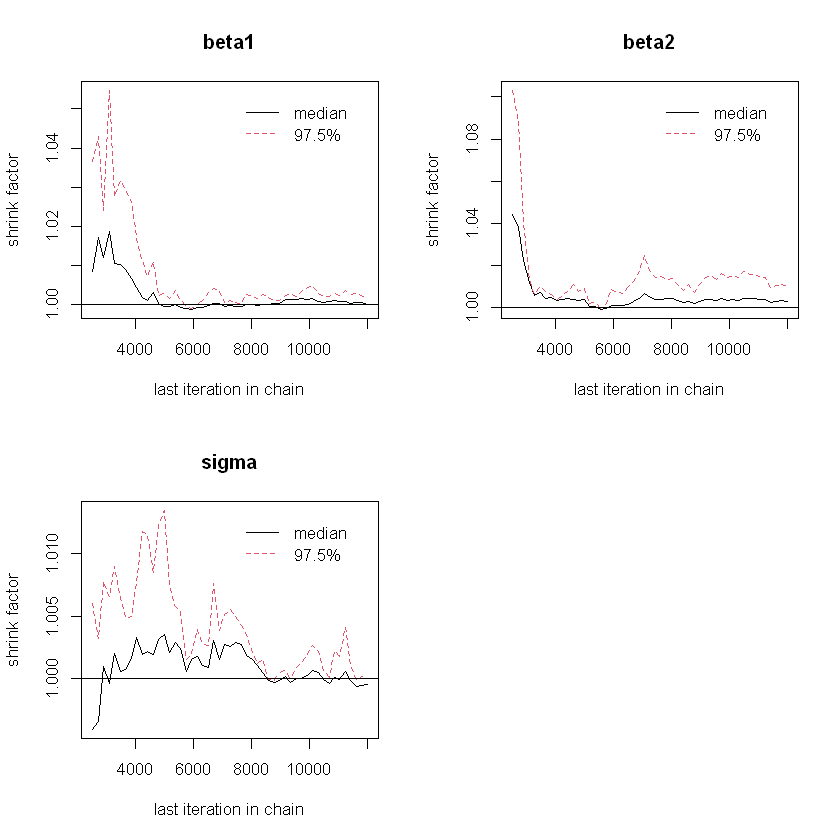

In [13]:
# b) autocorrelation of samples

autocorr.diag(res.snake)

#           beta1         beta2        sigma
# Lag 0    1.000000000  1.0000000000  1.000000000
# Lag 10  -0.042364897  0.0154337160 -0.017003074
# Lag 50  -0.031771650 -0.0020843421 -0.009945504
# Lag 100 -0.025130144  0.0000523702  0.011555804
# Lag 500 -0.001193404  0.0031277665 -0.014275575

autocorr.plot(res.snake)

# The autocorrelation of all the parameters approach zero as the lag increases
# which indicate convergence of the sample mean towards true mean

gelman.diag(res.snake)

gelman.plot(res.snake)

# Potential scale reduction factors:
#   
#           Point est. Upper C.I.
# beta1          1       1.01
# beta2          1       1.00
# sigma          1       1.00
# 
# Multivariate psrf
# 
# 1

# There is no evidence of non-convergence since:

# i) the scale redution factors are all below 1.1 which means that between chain variance and within chain variance are equal

# ii) the 97.5% quantiles for all the parameters are all below 1.1